In [3]:
import os
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ'

In [4]:
os.chdir("C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\bootcamp_ödev_finans_verisi")

In [5]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
!pip install researchpy
import researchpy as rp

# Verisetine İlk Bakışı Atmamızı Sağlayacak Olan Class

In [ ]:
class Information():
    def __init__(self,data):
        self.data = data
        
    
    def info(self):
        print(data.info())
        
    
    def copy(self):
        data1 = data.copy()
        data2 = data.copy()
    
    def describe(self):
        
        return data.describe()
        
    def shape(self):
        
        #type(data)
        print(data.axes)
        #print(self.data.axes)
        #print(" ndim = " + str(data.ndim))
        print(" Veri şekli = " + str(data.shape))
        print(" Veri büyüklüğü = " + str(data.size))
        #type(data.values)
    
    def head(self,row = None):
        
        return data.head(5)
        # print(data.tail(3))
        
    def hedef_degisken(self):
        
        print("**********************************")
        print(" 90_target Değişkeninin incelenmesi")
        print("Ortalama: " + str(data["90_target"].mean()))
        print("Dolu Gözlem Sayısı: " + str(data["90_target"].count())) 
        print("Maksimum Değer: " + str(data["90_target"].max()))
        print("Minimum Değer: " + str(data["90_target"].min()))
        print("Medyan: " + str(data["90_target"].median()))
        print("Standart Sapma: " + str(data["90_target"].std()))

# VERİ GÖRSELLEŞTİRME

### Bu class içerisinde incelemek istediğimiz değişkenleri görselleştirerek daha yakından tanıma fırsatı buluyoruz.

In [6]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def visual(self):
        data["ind_109"].value_counts().plot.barh().set_title("Job Değişkeninin Sınıf Frekansları");
    
    def countplot(self):
        sns.countplot(x="ind_109", data=data, palette="bwr")
        plt.show()
        
    def probplot(self):
        
        import statsmodels.api as sm
        import pylab
        import scipy.stats as stats
        stats.probplot(data["ind_18"],dist = "norm" , plot = pylab) # normal probability plot
        pylab.show()
        
    def scatterplot(self):
        data.plot.scatter("90_target","ind_18");
        
    def distplot(self):
        sns.distplot(data["90_target"], kde = False);
        
    def pairplot(self):
        
        #sns.pairplot(data);
        pass
        
    def pivotTable(self):
        
        # print(data.pivot_table("...",index = "...",columns = "..."))
        
        pass

# İSTATİSTİK

In [7]:
class stats():
    def __init__(self,data):
        self.data = data
        
    def imports(self):
        
        import scipy.stats as stats
        import statsmodels.stats.api as sms
        import pylab
        from scipy.stats.stats import pearsonr
        import researchpy as rp
        
    
    def table(self):
        
        print(rp.summary_cont(data[["ind_5","ind_6"]])) 
        
        print("*******************************")
        
        print(rp.summary_cat(data["ind_109"]))
        
        print("*******************************")
        
       
        
    def shapiro(self):
        
        import scipy.stats as stats
        from scipy.stats import shapiro
        test, p_value = shapiro(data["90_target"])
        
        print("Varsayım kontrolünde pvalue = " + str(p_value))
        
        
        if p_value > 0.05:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur.")
        else:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. vardır.")
        
        test_istatistigi, pvalue = stats.ttest_1samp(data["90_target"], popmean = 10000)
        print("pvalue = " + str(pvalue))
        
        if pvalue > 0.05 :
            print("H0 hipotezimiz reddedilemez.")
        else:
            print("H0 hipotezimiz reddelir.")   
        
        
        
    def qqplot(self):
        import pylab
        import scipy.stats as stats
        stats.probplot(data["90_target"], dist="norm", plot=pylab)
        pylab.show()
        
    def korelasyon_analiz(self):
        
        
        data.plot.scatter("90_target","ind_424");

        print(data["90_target"].corr(data["ind_424"])) # parametrik karşılığı
        
        # Hedef değişken 90_target için analiz
        
        print(data.corr()['90_target'].abs().sort_values(ascending=False))
        
        
    def korelasyon_map(self):
        
        corr = data.corr()
        # print(corr)
        # sns.heatmap(corr, 
        #xticklabels=corr.columns.values,
        #yticklabels=corr.columns.values)
        
        fig,ax = plt.subplots(figsize=(15, 15))
        sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

In [30]:
class PreProcessing():
    def __init__(self,data):
        self.data = data
        
    
    def copy_data(self):
        
        data2 = data.copy()
        data3 = data.copy()
        
    def outlier(self):
        
        t_data = data.dropna() # Eksik gözlemleri sildik. Aykırı gözlemleri rahatça görebilmek için.
        print(t_data.head())
        
        # Bir tane gözlemimi alıyorum.
        data_target = t_data["90_target"]
        sns.boxplot(x = data_target);
        
        Q1 = data_target.quantile(0.25)
        Q3 = data_target.quantile(0.75)
        IQR = Q3-Q1
       
        
        print(" IQR = " + str(Q3-Q1))
        print(" Alt Sınır = " + str(Q1- 1.5*IQR))
        print(" Üst Sınır = " + str(Q3 + 1.5*IQR))
        print(data_target.median())
       
        # Daha sonra aykırı değeri Baskılama ve ya Ortalama yöntemi ile doldurma işlemleri
    
    def MissingValue(self):
        
        print(data.isnull().sum())
        #print(data.isnull())
        #print(data[data.isnull().any(axis = 1)]) # Eksik değer olan satırlara erişmek
        
        # Bir gözlemi örnek alıyorum.
        # data["loan"]
        # data["loan"].mean()
        # print(data["loan"].fillna(data["loan"].mean())) # fillna doldurma işlemi için yapılıyor.
        
        # data.isna().values.any() #Kalan NaN değeri var mı kontrol etmek için
     
    def dropNa(self):
        data.dropna(inplace = True) # tüm eksik gözlemlerin silinmesi
        return data.isnull().sum()     
    
    def fillna(self):
        
        data.fillna(data.mean()[:],inplace = True) # eksik değerleri ortalama yöntemi ile doldurma
        
        # kategorik
        
        print(" En sık tekrarlanan değişken:" + str(data["ind_109"].mode()[0]))
        data["ind_109"].fillna(data["job"].mode()[0],inplace = True)
        
        return data.isnull().sum()
        
    def scale(self):
        from sklearn.preprocessing import StandardScaler  
        scaler = StandardScaler()
        scaler.fit(self.X_train)
        self.X_train_scaled = scaler.transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)
        
    
    def normalize(self):
        
        from sklearn import preprocessing
        preprocessing.normalize(self.X)
        
        
    def dummies(self):
        
        # Veri setinin hikayesini bilmediğim için şimdilik object değişkenleri siliyorum.
        # Bu object değişkenler önemli değişkenler de olabilir.
        
        cat = pd.get_dummies(data[['ind_109']])
        self.y = data["90_target"]
        self.X = data.drop(["90_target","50_target","20_target","ind_109","ind_420","ind_422"],axis =1).astype("float64")
        self.X = pd.concat([self.X, cat[["ind_109_GREEN","ind_109_RED"]]])
        return self.X.head(3)
        
        
    def onhazirlik(self): # burada DUMMIES yapmazsak modele sokulacak target değişken ve çıkarılması gereken değişkenler 
        
        
        self.y = data["90_target"]
        self.X = data.drop(["90_target","50_target","20_target","ind_109","ind_420","ind_422"],axis = 1)
        
        return self.X.head(3)
        
        
    
    
    def train_test_split(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
    
    
    def pca(self):
        
        from sklearn.decomposition import PCA
        from sklearn.preprocessing import scale 
        pca = PCA(4)
        self.X_reduced_train = pca.fit_transform(scale(self.X_train))
        self.X_reduced_test = pca.fit_transform(scale(self.X_test))
        
        import matplotlib.pyplot as plt
        features = range(pca.n_components_)
        plt.figure(figsize=(20,15))
        plt.bar(features, pca.explained_variance_ratio_, color = 'black')
        plt.xlabel('PCA Features')
        plt.ylabel('variance%')
        # plt.xticks(features)
        
        self.lm = LinearRegression()
        self.pcr_model = lm.fit(self.X_reduced_train, self.y_train)
        
        from sklearn.metrics import mean_squared_error, r2_score
        
        self.y_pred = self.pcr_model.predict(self.X_reduced_train)
        self.pcr_rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_pred))
        print(" TRAIN PCR RMSE:"+ str(self.pcr_rmse_train))
        
        self.y_pred_test = pcr_model.predict(self.X_reduced_test)
        self.pcr_rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_pred_test))
        print(" TEST PCR RMSE:"+ str(self.pcr_rmse_test))
        r_square_pcr = r2_score(y_test, y_pred)
        print("r^2 PCR:" + str(r_square_pcr))

        
        
        return np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    
    
        
    def lineer(self):
        
        self.X = data["ind_18"]
        self.y = data["90_target"]
        self.lm= sm.OLS(self.y,self.X) # burada normalite varsayımına gerek duymuyoruz.
        self.model = self.lm.fit()
        print("f_pvalue:" + str(self.model.f_pvalue))
        lineer_r = self.model.rsquared_adj
        print("r square:"  + str(self.model.rsquared_adj))
        
        self.model.fittedvalues[0:5]
        # Artıklar ve önemi
        from sklearn.metrics import mean_squared_error, r2_score
        self.mse = mean_squared_error(self.y, self.model.fittedvalues)
        self.rmse = np.sqrt(self.mse)
        print("rmse:" + str(self.rmse))
        
        self.model.resid[0:10] # hatalar
        plt.plot(self.model.resid) 
        
        
        return self.model.summary()
        
        # Modelin anlamlılığına ilişkin p value değeri. Çok küçükse model anlamlıdır.
        # çok yüksek çıksaydı modele giren değişkenlerin hiçbir anlamı yok yani X'lerin bi etkisi yok gibi 
        # Hepsinin beta'sı sıfır gibi katsayıları yani..
     
    def multi_lineer(self):
        
        import seaborn as sns
        self.lm = sm.OLS(self.y_train, self.X_train)
        self.model = self.lm.fit()
        self.influence = self.model.get_influence() 
        
        self.resid_student = self.influence.resid_studentized_external 
        (cooks,p)=self.influence.cooks_distance
        (dffits,p)=self.influence.dffits
        self.leverage=self.influence.hat_matrix_diag
        print('Leverag v.s. Studentized Residuals')
        sns.regplot(self.leverage, self.model.resid_pearson, fit_reg=False) #hatalarımın dağılımını görüyorum.
        self.rmse = np.sqrt(mean_squared_error(self.y_test, self.model.predict(self.X_test)))
        print("rmse:"+ str(self.rmse))
        return self.model.summary().tables[1]
    
    def error_test(self):
        
        import seaborn as sns 
        import pandas as pd
        import numpy as np
        
        advres = pd.concat([data , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)
        sns.kdeplot(np.array(advres.resid), bw=10)
        
    def qqplot_error(self):
        import statsmodels.api as sm
        sm.qqplot(advres.resid)
        plt.show()
        
        
    def SVR(self):
        from sklearn.svm import SVR
        self.svr_model = SVR("linear").fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.svr_model.predict(self.X_reduced_test)
        self.rmse_svr = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("SVR RMSE:"+ str(self.rmse_svr))
        
        
    def ModelTuningSVR(self):
        
        self.svr_params = {"C": np.arange(0.1,2,0.1)}
        self.svr_cv_model = GridSearchCV(self.svr_model, self.svr_params, cv = 3,n_jobs = -1, verbose = 2).fit(self.X_reduced_train,self.y_train)

        print("En iyi parametreler: " + str(svr_cv_model.best_params_))
        
        self.svr_tuned = SVR("linear", 
                        C = self.svr_cv_model.best_params_["C"]).fit(self.X_reduced_train, self.y_train)
        
        self.y_pred = self.svr_tuned.predict(self.X_reduced_test)
        self.rmse_svr_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        
        print(" TUNED SVR RMSE:"+ str(self.rmse_svr_tuned))
        
    def RBF(self): 
        
        self.svr_rbf = SVR("rbf").fit(self.X_reduced_train, self.y_train)
        self.y_pred = svr_rbf.predict(self.X_reduced_test)
        self.rmse_rbf_svr = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("RBF RMSE:"+ str(self.rmse_rbf_svr))
    
    def ModelTuningRBF(self):
        
        self.svr_params = {"C": [0.1,0.4,5,15]}
        self.svr_cv_model = GridSearchCV(self.svr_rbf,self.svr_params, cv = 3,n_jobs = -1, verbose = 2)
        self.svr_cv_model.fit(self.X_reduced_train, self.y_train)
        print("En iyi parametreler: " + str(self.svr_cv_model.best_params_))
        self.svr_tuned = SVR("rbf", C = self.svr_cv_model.best_params_["C"]).fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.svr_tuned.predict(self.X_reduced_test)

        self.rmse_rbf_svr_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
         
        print(" TUNED RBF RMSE:"+ str(self.rmse_svr_tuned))

    
    
    def MLPR(self):
        
        from sklearn.neural_network import MLPRegressor
        self.mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.mlp_model.predict(self.X_reduced_test)
        self.rmse_mlp = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("MLPR RMSE:"+ str(self.rmse_mlp))
        
    def ModelTuning_MLPR(self):
        self.mlp_params = {'alpha': [0.1,0.02,0.005],
                      'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
                      'activation': ['relu','logistic']}
        self.mlp_cv_model = GridSearchCV(self.mlp_model, self.mlp_params, cv = 3,n_jobs = -1 , verbose =2)
        self.mlp_cv_model.fit(self.X_reduced_train, self.y_train)
        print("En iyi parametreler: " + str(self.mlp_cv_model.best_params_))
        
        self.mlp_tuned = MLPRegressor(alpha = self.mlp_cv_model.best_params_["alpha"] , hidden_layer_sizes = self.mlp_cv_model.best_params_["hidden_layer_sizes"],
                        activation = self.mlp_cv_model.best_params_["activation"])
        self.mlp_tuned.fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.mlp_tuned.predict(self.X_reduced_test)
        self.rmse_mlp_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print(" TUNED MLP RMSE:"+ str(self.rmse_mlp_tuned))

    
    def gradientboost(self):
        
        from sklearn.ensemble import GradientBoostingRegressor
        self.gbm_model = GradientBoostingRegressor()
        self.gbm_model.fit(self.X_reduced_train, self.y_train)
        # Tahmin
        self.y_pred = self.gbm_model.predict(self.X_reduced_test)
        self.rmse_gbm = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("GBM RMSE:"+ str(self.rmse_gbm))
     
    def ModelTuning_gradientboost(self):
        
        gbm_params = {'learning_rate': [0.01, 0.1, 0.2],
                      'max_depth': [3, 5,50,100],
                      'n_estimators': [200, 500, 1000],
                      'subsample': [1,0.5,0.75],
                     }
        
        self.gbm = GradientBoostingRegressor()
        self.gbm_cv_model = GridSearchCV(self.gbm, self.gbm_params, cv = 2, n_jobs = -1, verbose = 2)
        self.gbm_cv_model.fit(self.X_reduced_train, self.y_train)
        print("En iyi parametreler: " + str(self.gbm_cv_model.best_params_))
        
        self.gbm_tuned = GradientBoostingRegressor(learning_rate = self.bm_cv_model.best_params_["learning_rate"],  
                                                   max_depth = self.gbm_cv_model.best_params_["max_depth"], 
                                                   n_estimators = self.gbm_cv_model.best_params_["n_estimators"], 
                                                   subsample = self.gbm_cv_model.best_params_["subsample"])

        self.gbm_tuned = gbm_tuned.fit(self.X_reduced_train,self.y_train)
        self.y_pred = gbm_tuned.predict(self.X_reduced_test)
        self.rmse_gbm_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print(" TUNED GBM RMSE:"+ str(self.rmse_gbm_tuned))
     
    
    def KNN(self):
        import matplotlib.pyplot as plt
        from sklearn.neighbors import KNeighborsRegressor
        
        self.knn_model = KNeighborsRegressor().fit(self.X_reduced_train, self.y_train)
        
        print("n_neighbors:" + str(self.knn_model.n_neighbors))
        print("effective_metric:" + str(self.knn_model.effective_metric_))
        self.y_pred = self.knn_model.predict(self.X_reduced_test)
        self.rmse_knn = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("KNN RMSE:"+ str(self.rmse_knn))
        
    def ModelTuning_KNN(self):
        
        import matplotlib.pyplot as plt
        from sklearn.neighbors import KNeighborsClassifier
        
        from sklearn.model_selection import GridSearchCV
        self.knn_params = {'n_neighbors': np.arange(1,30,1)}
        self.knn = KNeighborsRegressor()
        self.knn_cv_model = GridSearchCV(self.knn, self.knn_params, cv = 3,n_jobs = -1, verbose = 2)
        self.knn_cv_model.fit(self.X_reduced_train, self.y_train)
        self.knn_cv_model.best_params_["n_neighbors"]
       

        self.knn_tuned = KNeighborsRegressor(n_neighbors = self.knn_cv_model.best_params_["n_neighbors"])
        self.knn_tuned.fit(self.X_reduced_train, self.y_train)
        self.rmse_knn_tuned = np.sqrt(mean_squared_error(self.y_test, self.knn_tuned.predict(self.X_reduced_test)))
        print("KNN TUNED RMSE:"+ str(self.rmse_knn_tuned))

### ÖDEV AMACI; PCA ile boyut düşürerek modeller uygulamak olduğu için object değişkenlerimden ind_109 'a dummy yapacağım.

### PCA uygulamamızın amacı modellerin daha hızlı çalışmasını sağlamaktır. Daha güçlü bir bilgisayar da PCA yapmamak ve ya daha doğru bir şekilde PCA yaparak verisetini modellere sokmak daha doğru olacaktır.

### Diğer 2 object değişken olarak gözüken değişkenlerimi ise yanlış etiketlendiği gerekçesi ile integer'a dönüştüreceğim ve ya direk drop edeceğim.

### Bu çalışmada direk droplamayı tercih ediyorum.

In [16]:
data = pd.read_excel("HW_Data_Set.xlsx")

In [31]:
pre = PreProcessing(data)

f_pvalue:1.1388842633054801e-05
r square:0.002957781621115374
rmse:36.92967855102184


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     19.29
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           1.14e-05
Time:                        18:00:47   Log-Likelihood:                -31007.
No. Observations:                6167   AIC:                         6.202e+04
Df Residuals:                    6166   BIC:                         6.202e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_18        -0.1712      0.039     -4.393      0.000      -0.248      -0.095
==============================================================================
Omnibus:                       31.967   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.544
Skew:                           0.178   Prob(JB):                    1.35e-220
Kurtosis:                       1.047   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

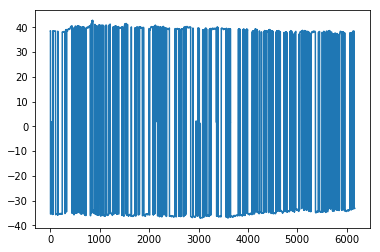

In [32]:
pre.lineer()

## Devamını yetiştiremedim hocam kusura bakmayın.. Bilgisayarım çok yavaş. Geri kalan aşamalarda da aynı şekilde yapıp en son karşılaştırma grafiği koyacaktım..